In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel(r'C:\Users\useme\Downloads\E-commerce.xlsx')

In [3]:
data.head()

,server_time,device_type,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,os_version,is_4G,is_click
0,2018-10-18 14:27:00,android,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,old,0,0
1,2018-10-18 14:27:00,android,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,latest,1,1
2,2018-10-18 14:43:00,android,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,intermediate,1,0
3,2018-10-18 14:46:00,android,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,latest,1,0
4,2018-10-18 14:46:00,android,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,latest,0,0


In [4]:
data.shape

(2025, 13)

In [5]:
data.isna().sum()

server_time        0
device_type        0
user_id            3
session_id         1
item_id            2
item_price         1
category           6
product_type       1
impression_time    0
app_code           1
os_version         9
is_4G              0
is_click           0
dtype: int64

In [6]:
data.columns

Index(['server_time', 'device_type', 'user_id', 'session_id', 'item_id',
       'item_price', 'category', 'product_type', 'impression_time', 'app_code',
       'os_version', 'is_4G', 'is_click'],
      dtype='object')

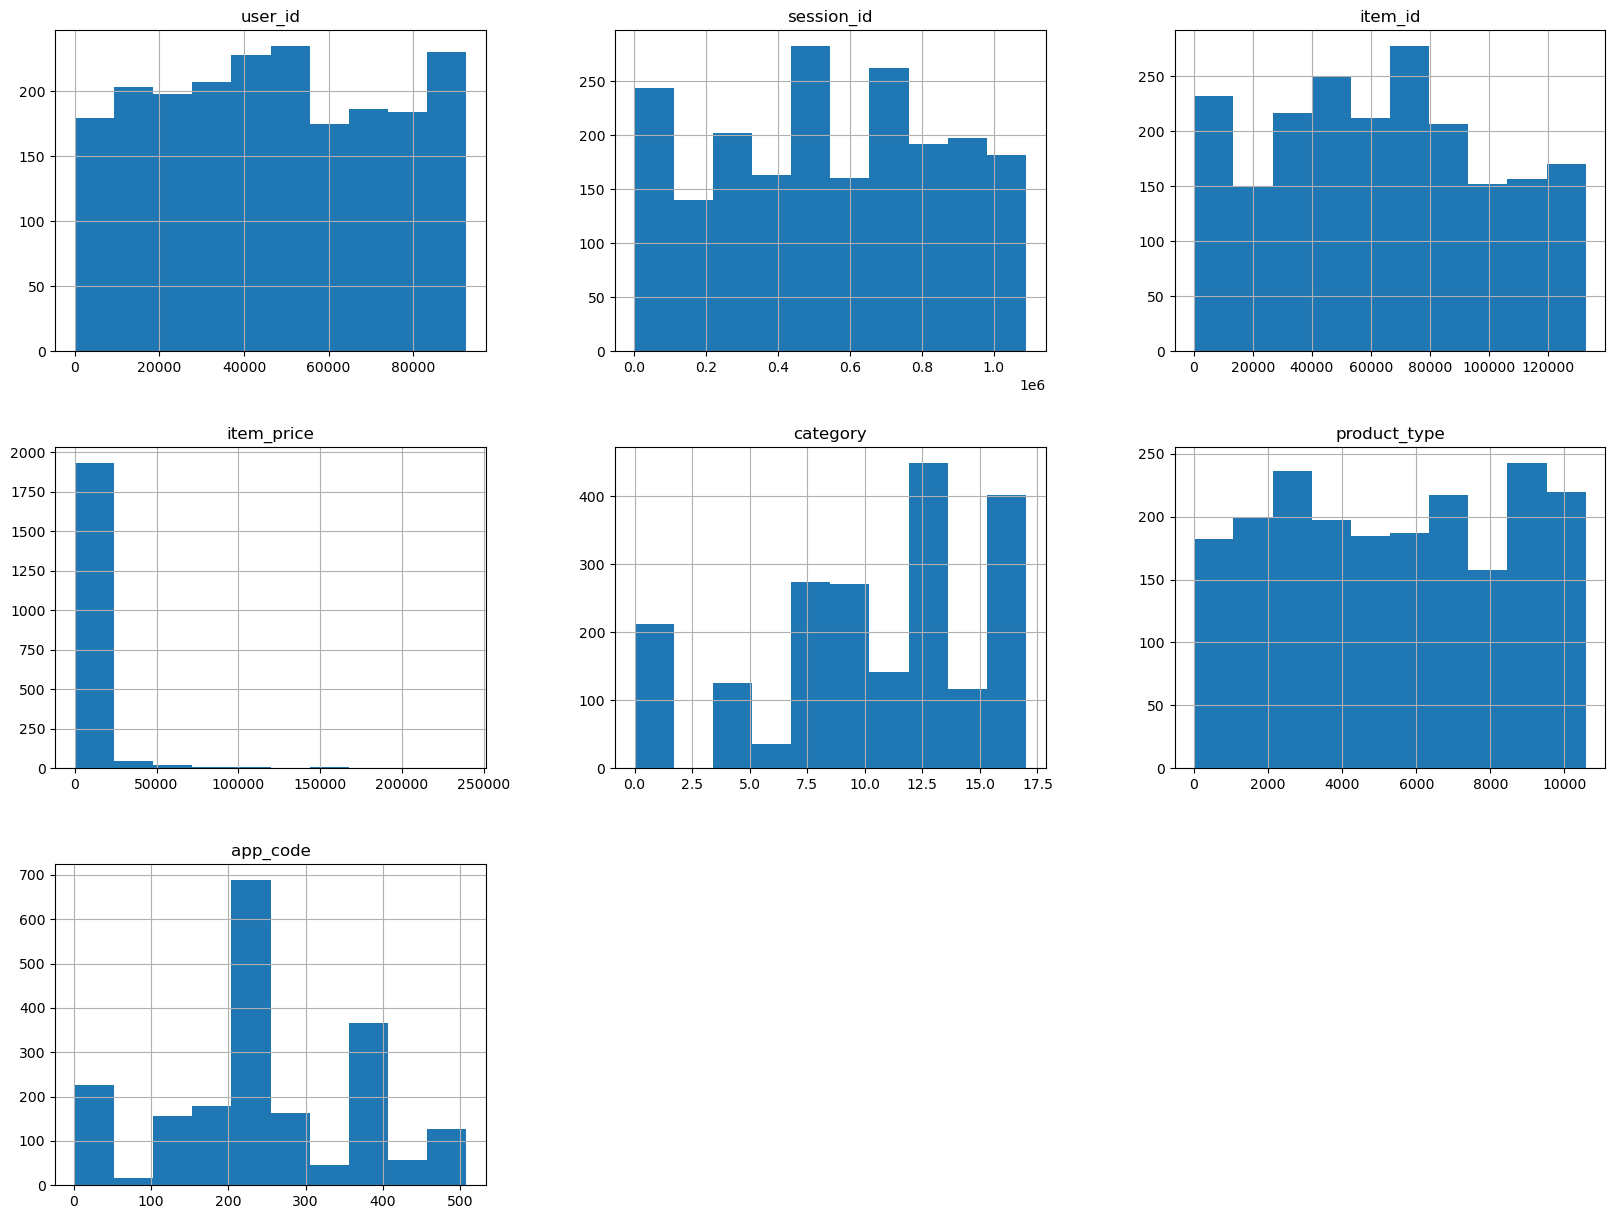

In [8]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [7]:
for col in ['user_id', 'session_id', 'item_id',
       'item_price', 'category', 'product_type', 'app_code']:
    data[col]=data[col].fillna(data[col].median())

In [8]:
data['os_version'].mode()

0    latest
Name: os_version, dtype: object

In [9]:
data['os_version']=data['os_version'].fillna(data['os_version'].mode()[0])

In [10]:
data.isna().sum()

server_time        0
device_type        0
user_id            0
session_id         0
item_id            0
item_price         0
category           0
product_type       0
impression_time    0
app_code           0
os_version         0
is_4G              0
is_click           0
dtype: int64

Outlier handling

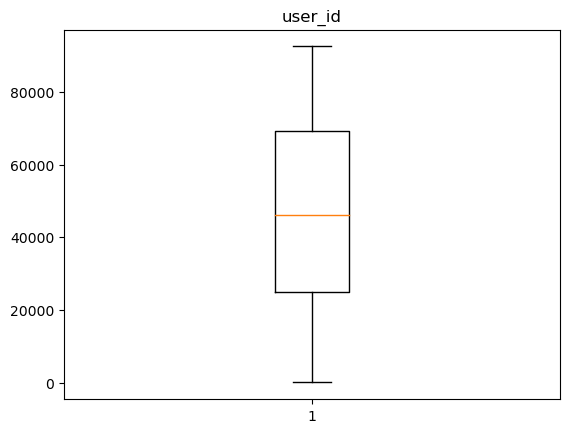

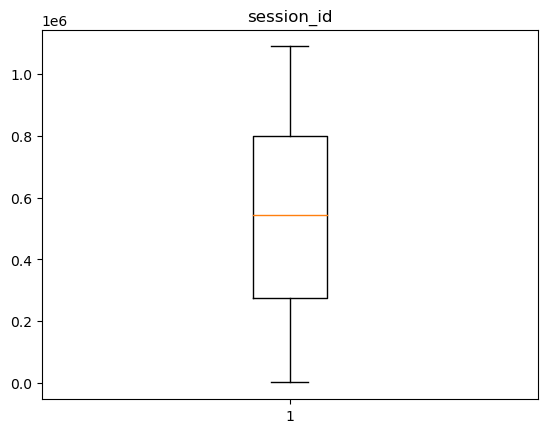

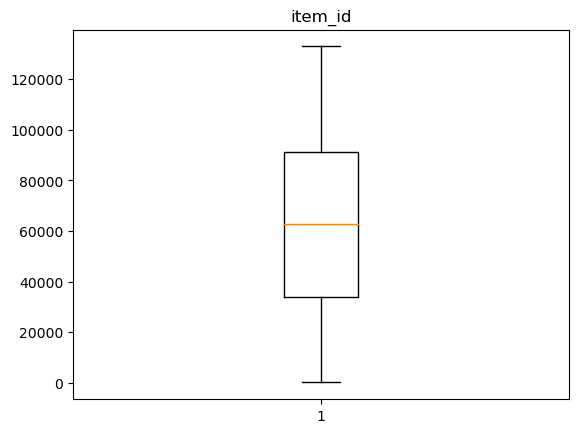

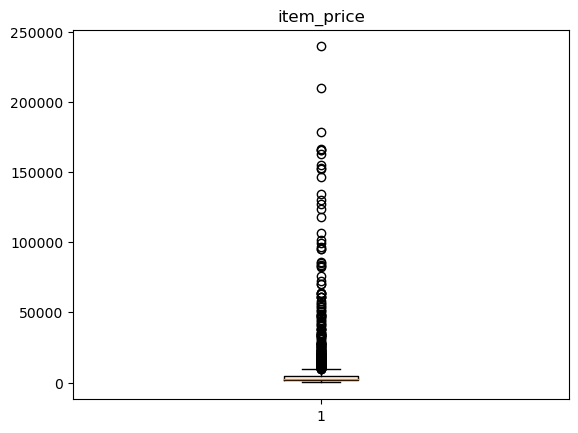

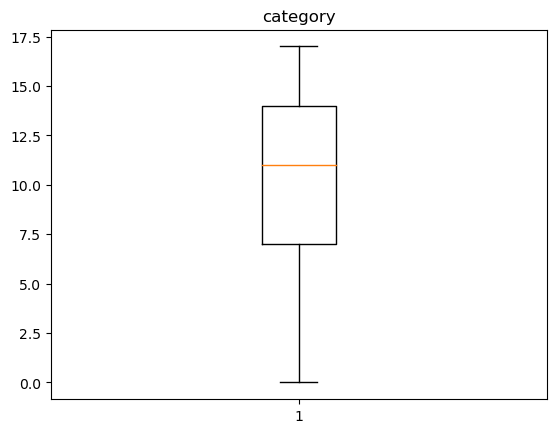

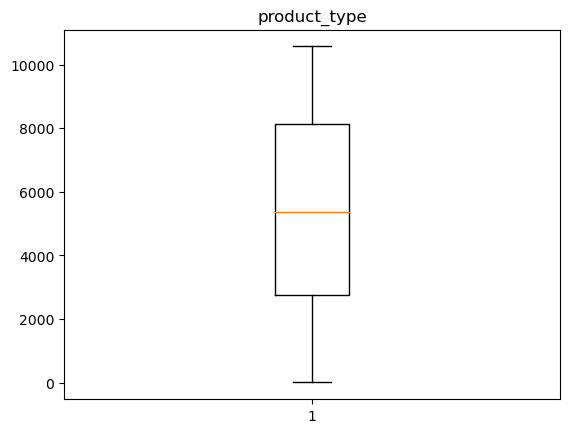

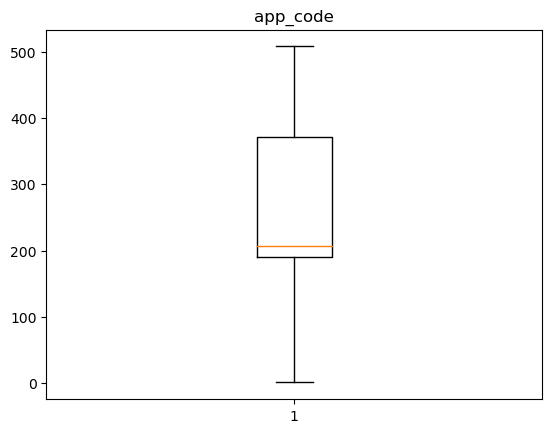

In [11]:
num_col=['user_id', 'session_id', 'item_id',
       'item_price', 'category', 'product_type', 'app_code']
for i in num_col:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

In [12]:
Q1=np.percentile(data['item_price'],25,interpolation='midpoint')
Q2=np.percentile(data['item_price'],50,interpolation='midpoint')
Q3=np.percentile(data['item_price'],75,interpolation='midpoint')

C:\Users\useme\AppData\Local\Temp\ipykernel_192\3388736594.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1=np.percentile(data['item_price'],25,interpolation='midpoint')
C:\Users\useme\AppData\Local\Temp\ipykernel_192\3388736594.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2=np.percentile(data['item_price'],50,interpolation='midpoint')
C:\Users\useme\AppData\Local\Temp\ipykernel_192\3388736594.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'hig

In [13]:
print(Q1)
print(Q2)
print(Q3)

1465.0
2425.0
4793.0


In [14]:
data['item_price'].median()

2425.0

In [15]:
IQR=Q3-Q1

In [16]:
print(IQR)

3328.0


In [17]:
up_lim=Q3+1.5*IQR
low_lim=Q1-1.5*IQR

In [18]:
print(up_lim)
print(low_lim)

9785.0
-3527.0


In [19]:
outlier=[]
for x in data['item_price']:
    if (x<low_lim) or (x>up_lim):
        outlier.append(x)

In [20]:
print(outlier)

[18118.0, 17856.0, 17222.0, 11462.0, 10246.0, 23040.0, 10822.0, 10816.0, 11712.0, 12221.0, 46656.0, 20492.0, 85760.0, 9990.0, 54336.0, 15296.0, 13984.0, 33984.0, 13420.0, 19526.0, 51136.0, 9959.0, 10758.0, 10886.0, 25472.0, 35136.0, 11404.0, 11456.0, 99507.0, 12280.0, 53625.0, 18668.0, 22208.0, 21409.0, 83776.0, 14906.0, 18557.0, 130154.0, 20416.0, 14080.0, 117849.0, 17222.0, 178099.0, 165665.0, 11369.0, 32576.0, 10240.0, 14016.0, 41369.0, 16416.0, 63936.0, 10087.0, 10310.0, 12096.0, 10298.0, 21120.0, 26956.0, 13000.0, 16960.0, 152652.0, 16128.0, 47936.0, 10039.0, 19008.0, 9792.0, 27545.0, 20160.0, 10310.0, 18278.0, 165665.0, 96768.0, 10816.0, 14656.0, 64000.0, 37916.0, 70336.0, 27400.0, 24969.0, 15808.0, 15296.0, 40256.0, 12672.0, 49016.0, 61056.0, 15968.0, 22348.0, 17665.0, 22912.0, 16265.0, 47360.0, 20428.0, 12736.0, 21248.0, 11392.0, 32808.0, 27443.0, 10771.0, 10944.0, 11008.0, 17664.0, 31040.0, 20416.0, 18346.0, 15232.0, 15936.0, 20505.0, 12793.0, 43968.0, 134122.0, 11136.0, 10586

In [21]:
ind1=data['item_price']>up_lim
ind=data.loc[ind1].index.tolist()
print(ind)

[6, 7, 31, 34, 49, 51, 63, 68, 74, 86, 90, 107, 110, 113, 114, 122, 127, 138, 146, 161, 176, 179, 184, 191, 228, 242, 290, 294, 314, 325, 328, 352, 353, 368, 370, 386, 399, 419, 423, 428, 442, 447, 453, 458, 463, 464, 465, 467, 471, 472, 475, 478, 481, 493, 512, 538, 543, 561, 577, 581, 584, 595, 596, 598, 600, 603, 610, 639, 643, 644, 651, 663, 664, 669, 679, 688, 713, 715, 722, 726, 732, 736, 752, 767, 778, 800, 801, 840, 846, 849, 859, 865, 888, 900, 912, 925, 929, 942, 949, 953, 962, 970, 977, 984, 985, 992, 1000, 1013, 1024, 1025, 1033, 1035, 1037, 1057, 1060, 1063, 1065, 1106, 1113, 1121, 1132, 1140, 1146, 1151, 1157, 1166, 1168, 1182, 1198, 1199, 1204, 1206, 1213, 1238, 1248, 1257, 1264, 1267, 1272, 1278, 1281, 1298, 1305, 1320, 1325, 1327, 1329, 1342, 1359, 1373, 1374, 1376, 1386, 1387, 1393, 1396, 1419, 1424, 1426, 1432, 1445, 1446, 1451, 1455, 1460, 1487, 1488, 1490, 1503, 1511, 1520, 1529, 1535, 1542, 1551, 1556, 1560, 1572, 1580, 1584, 1585, 1586, 1592, 1594, 1599, 1606, 16

In [22]:
data.drop([6, 7, 31, 34, 49, 51, 63, 68, 74, 86, 90, 107, 110, 113, 114, 122, 127, 138, 146, 161, 176, 179, 184, 191, 228, 242, 290, 294, 314, 325, 328, 352, 353, 368, 370, 386, 399, 419, 423, 428, 442, 447, 453, 458, 463, 464, 465, 467, 471, 472, 475, 478, 481, 493, 512, 538, 543, 561, 577, 581, 584, 595, 596, 598, 600, 603, 610, 639, 643, 644, 651, 663, 664, 669, 679, 688, 713, 715, 722, 726, 732, 736, 752, 767, 778, 800, 801, 840, 846, 849, 859, 865, 888, 900, 912, 925, 929, 942, 949, 953, 962, 970, 977, 984, 985, 992, 1000, 1013, 1024, 1025, 1033, 1035, 1037, 1057, 1060, 1063, 1065, 1106, 1113, 1121, 1132, 1140, 1146, 1151, 1157, 1166, 1168, 1182, 1198, 1199, 1204, 1206, 1213, 1238, 1248, 1257, 1264, 1267, 1272, 1278, 1281, 1298, 1305, 1320, 1325, 1327, 1329, 1342, 1359, 1373, 1374, 1376, 1386, 1387, 1393, 1396, 1419, 1424, 1426, 1432, 1445, 1446, 1451, 1455, 1460, 1487, 1488, 1490, 1503, 1511, 1520, 1529, 1535, 1542, 1551, 1556, 1560, 1572, 1580, 1584, 1585, 1586, 1592, 1594, 1599, 1606, 1613, 1632, 1636, 1641, 1644, 1646, 1661, 1670, 1673, 1678, 1695, 1697, 1699, 1709, 1722, 1723, 1724, 1726, 1741, 1743, 1746, 1756, 1769, 1780, 1789, 1790, 1803, 1804, 1805, 1808, 1810, 1813, 1827, 1829, 1832, 1837, 1856, 1857, 1858, 1860, 1861, 1865, 1866, 1868, 1869, 1877, 1879, 1882, 1885, 1933, 1937, 1948, 1953, 1961, 1978, 1981, 1983, 1998, 2012],inplace=True)

In [23]:
data.shape

(1780, 13)

One hot encoding

In [24]:
data1 = pd.get_dummies(data)

In [25]:
data1.shape

(1780, 15)

In [26]:
data.dtypes

server_time        datetime64[ns]
device_type                object
user_id                   float64
session_id                float64
item_id                   float64
item_price                float64
category                  float64
product_type              float64
impression_time    datetime64[ns]
app_code                  float64
os_version                 object
is_4G                       int64
is_click                    int64
dtype: object

In [27]:
data['device_type'].nunique()

1

In [28]:
data['os_version'].nunique()

3

In [29]:
data1.head()

,server_time,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,is_4G,is_click,device_type_android,os_version_intermediate,os_version_latest,os_version_old
0,2018-10-18 14:27:00,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,0,0,1,0,0,1
1,2018-10-18 14:27:00,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,1,1,1,0,1,0
2,2018-10-18 14:43:00,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,1,0,1,1,0,0
3,2018-10-18 14:46:00,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,1,0,1,0,1,0
4,2018-10-18 14:46:00,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,0,0,1,0,1,0


Label Encoding 

In [30]:
data.head()

,server_time,device_type,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,os_version,is_4G,is_click
0,2018-10-18 14:27:00,android,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,old,0,0
1,2018-10-18 14:27:00,android,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,latest,1,1
2,2018-10-18 14:43:00,android,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,intermediate,1,0
3,2018-10-18 14:46:00,android,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,latest,1,0
4,2018-10-18 14:46:00,android,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,latest,0,0


In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
le = LabelEncoder()

In [33]:
data['os_version']=le.fit_transform(data['os_version'])

In [34]:
data.head()

,server_time,device_type,user_id,session_id,item_id,item_price,category,product_type,impression_time,app_code,os_version,is_4G,is_click
0,2018-10-18 14:27:00,android,87862.0,268465.0,44459.0,4602.0,11.0,3040.0,2018-11-15 00:00:00,422.0,2,0,0
1,2018-10-18 14:27:00,android,63410.0,268465.0,44459.0,3513.0,12.0,6822.0,2018-11-15 00:01:00,467.0,1,1,1
2,2018-10-18 14:43:00,android,71748.0,268465.0,44459.0,825.0,17.0,1619.0,2018-11-15 00:02:00,259.0,0,1,0
3,2018-10-18 14:46:00,android,69209.0,268465.0,44459.0,2355.0,13.0,5264.0,2018-11-15 00:02:00,244.0,1,1,0
4,2018-10-18 14:46:00,android,62873.0,268465.0,44459.0,1267.0,17.0,10239.0,2018-11-15 00:02:00,473.0,1,0,0


Min max scaling

In [35]:
x = data.drop('item_price',axis=1)
y = data['item_price']

In [36]:
x.describe()

,user_id,session_id,item_id,category,product_type,app_code,os_version,is_4G,is_click
count,1780.000000,1.780000e+03,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000
mean,46729.493820,5.467858e+05,63532.398876,10.260112,5367.814888,244.198876,0.988202,0.342697,0.048315
std,26387.962825,3.087378e+05,36639.606662,4.840605,3077.228646,124.634935,0.685000,0.474744,0.214490
min,10.000000,1.694000e+03,176.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000
25%,24882.250000,2.738070e+05,34687.000000,7.000000,2739.500000,190.000000,1.000000,0.000000,0.000000
50%,46148.000000,5.440370e+05,63579.500000,11.000000,5403.000000,207.000000,1.000000,0.000000,0.000000
75%,69426.000000,7.992640e+05,90815.000000,13.000000,8121.000000,371.000000,1.000000,1.000000,0.000000
max,92508.000000,1.089219e+06,132865.000000,17.000000,10573.000000,508.000000,2.000000,1.000000,1.000000


In [39]:
x1 = x.drop(['os_version','device_type','server_time','impression_time'],axis=1)

In [40]:
x1.head()

,user_id,session_id,item_id,category,product_type,app_code,is_4G,is_click
0,87862.0,268465.0,44459.0,11.0,3040.0,422.0,0,0
1,63410.0,268465.0,44459.0,12.0,6822.0,467.0,1,1
2,71748.0,268465.0,44459.0,17.0,1619.0,259.0,1,0
3,69209.0,268465.0,44459.0,13.0,5264.0,244.0,1,0
4,62873.0,268465.0,44459.0,17.0,10239.0,473.0,0,0


In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
min_max = MinMaxScaler()

In [43]:
x1 = min_max.fit_transform(x1)

In [44]:
type(x1)

numpy.ndarray

In [45]:
x1 = pd.DataFrame(x1,columns=['user_id','session_id','item_id','category','product_type','app_code','is_4G','is_click'])

In [46]:
x1.describe()

,user_id,session_id,item_id,category,product_type,app_code,is_4G,is_click
count,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000
mean,0.505087,0.501222,0.477480,0.603536,0.507318,0.479682,0.342697,0.048315
std,0.285281,0.283890,0.276131,0.284741,0.291266,0.245828,0.474744,0.214490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.268895,0.250213,0.260089,0.411765,0.258542,0.372781,0.000000,0.000000
50%,0.498800,0.498695,0.477835,0.647059,0.510648,0.406312,0.000000,0.000000
75%,0.750459,0.733381,0.683094,0.764706,0.767913,0.729783,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


standard scaling

In [47]:
x.describe()

,user_id,session_id,item_id,category,product_type,app_code,os_version,is_4G,is_click
count,1780.000000,1.780000e+03,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000,1780.000000
mean,46729.493820,5.467858e+05,63532.398876,10.260112,5367.814888,244.198876,0.988202,0.342697,0.048315
std,26387.962825,3.087378e+05,36639.606662,4.840605,3077.228646,124.634935,0.685000,0.474744,0.214490
min,10.000000,1.694000e+03,176.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000
25%,24882.250000,2.738070e+05,34687.000000,7.000000,2739.500000,190.000000,1.000000,0.000000,0.000000
50%,46148.000000,5.440370e+05,63579.500000,11.000000,5403.000000,207.000000,1.000000,0.000000,0.000000
75%,69426.000000,7.992640e+05,90815.000000,13.000000,8121.000000,371.000000,1.000000,1.000000,0.000000
max,92508.000000,1.089219e+06,132865.000000,17.000000,10573.000000,508.000000,2.000000,1.000000,1.000000


In [48]:
x2 = x.drop(['os_version','device_type','server_time','impression_time'],axis=1)

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
std_scl = StandardScaler()

In [51]:
x2 = std_scl.fit_transform(x2)

In [52]:
type(x2)

numpy.ndarray

In [53]:
x2 = pd.DataFrame(x2,columns=['user_id','session_id','item_id','category','product_type','app_code','is_4G','is_click'])

In [55]:
x2.describe()

,user_id,session_id,item_id,category,product_type,app_code,is_4G,is_click
count,1.780000e+03,1.780000e+03,1.780000e+03,1.780000e+03,1.780000e+03,1.780000e+03,1.780000e+03,1.780000e+03
mean,-8.183217e-17,5.987720e-18,7.983626e-17,1.097749e-16,2.594679e-17,9.181170e-17,3.991813e-18,-1.995907e-18
std,1.000281e+00,1.000281e+00,1.000281e+00,1.000281e+00,1.000281e+00,1.000281e+00,1.000281e+00,1.000281e+00
min,-1.770983e+00,-1.766045e+00,-1.729664e+00,-2.120188e+00,-1.742256e+00,-1.951838e+00,-7.220578e-01,-2.253163e-01
25%,-8.281573e-01,-8.844253e-01,-7.874949e-01,-6.736820e-01,-8.543575e-01,-4.349832e-01,-7.220578e-01,-2.253163e-01
50%,-2.204252e-02,-8.905908e-03,1.285886e-03,1.528932e-01,1.143724e-02,-2.985465e-01,-7.220578e-01,-2.253163e-01
75%,8.603500e-01,8.180052e-01,7.448297e-01,5.661808e-01,8.949477e-01,1.017666e+00,1.384931e+00,-2.253163e-01
max,1.735313e+00,1.757432e+00,1.892817e+00,1.392756e+00,1.691993e+00,2.117185e+00,1.384931e+00,4.438206e+00
